In [1]:
import os,shutil

In [2]:
base_dir="C:\\Users\\Gaurav\\DL\\dogVScat\\"
train_dir="C:\\Users\\Gaurav\\DL\\dogVScat\\train\\"

In [3]:
val_dir=os.path.join(base_dir,"val")
test_dir=os.path.join(base_dir,"test")

In [4]:
train_cat=os.path.join(train_dir,"cat")
train_dog=os.path.join(train_dir,"dog")

os.mkdir(val_dir)
os.mkdir(train_cat)
os.mkdir(train_dog)

fnames=["cat.{}.jpg".format(i) for i in range(5000)]
fnames.extend(["dog.{}.jpg".format(i) for i in range(5000)])
for fname in fnames:
    src=os.path.join(train_dir+"\\train",fname)
    dest=os.path.join(val_dir,fname)
    shutil.move(src,dest)

In [4]:
from keras import layers,models
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Using TensorFlow backend.


In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [6]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=30,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(val_dir,target_size=(150,150),batch_size=30,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
history=model.fit_generator(train_generator,epochs=30,steps_per_epoch=100,
                            validation_data=validation_generator,validation_steps=50)

Epoch 1/30
100/100 [==============================] - 134s 1s/step - loss: 0.7517 - accuracy: 0.5204 - val_loss: 0.7052 - val_accuracy: 0.5264
Epoch 2/30
100/100 [==============================] - 127s 1s/step - loss: 0.6831 - accuracy: 0.5785 - val_loss: 0.7134 - val_accuracy: 0.5115
Epoch 3/30
100/100 [==============================] - 125s 1s/step - loss: 0.6423 - accuracy: 0.6515 - val_loss: 0.6187 - val_accuracy: 0.6308
Epoch 4/30
100/100 [==============================] - 129s 1s/step - loss: 0.5680 - accuracy: 0.7060 - val_loss: 0.5673 - val_accuracy: 0.5750
Epoch 5/30
100/100 [==============================] - 129s 1s/step - loss: 0.5022 - accuracy: 0.7609 - val_loss: 0.6519 - val_accuracy: 0.6493
Epoch 6/30
100/100 [==============================] - 124s 1s/step - loss: 0.4315 - accuracy: 0.7977 - val_loss: 0.6614 - val_accuracy: 0.7007
Epoch 7/30
100/100 [==============================] - 125s 1s/step - loss: 0.3325 - accuracy: 0.8522 - val_loss: 0.3171 - val_accuracy: 0.7240

In [10]:
model.save("cat_vs_dog_1.h5")

from keras.models import load_model
history=load_model("cat_vs_dog_1.h5")

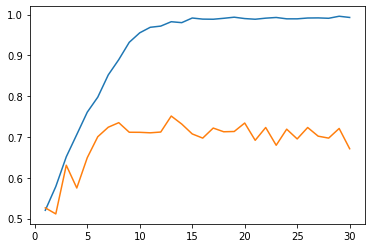

In [11]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs=range(1,31)
plt.plot(epochs,acc,label='Train Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.show()

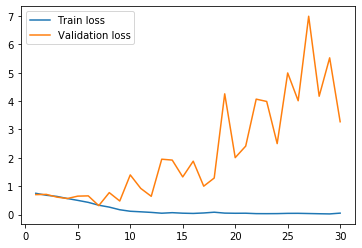

In [12]:
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,31)
plt.plot(epochs,loss,label='Train loss')
plt.plot(epochs,val_loss,label='Validation loss')
plt.legend()
plt.show()

DATA AUGMENTATION

In [13]:
from keras import layers,models
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [14]:
train_datagen=ImageDataGenerator(rescale=1./255,
                            rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                          shear_range=0.2,
                          zoom_range=0.2,
                          horizontal_flip=True)

In [15]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [16]:
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=32,class_mode='binary')
test_generator=test_datagen.flow_from_directory(val_dir,target_size=(150,150),batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,
                              validation_data=validation_generator,validation_steps=50)

Epoch 1/100
100/100 [==============================] - 146s 1s/step - loss: 0.7543 - accuracy: 0.5148 - val_loss: 0.6898 - val_accuracy: 0.5020
Epoch 2/100
100/100 [==============================] - 142s 1s/step - loss: 0.6897 - accuracy: 0.5546 - val_loss: 0.6676 - val_accuracy: 0.5642
Epoch 3/100
100/100 [==============================] - 141s 1s/step - loss: 0.6893 - accuracy: 0.5587 - val_loss: 0.6862 - val_accuracy: 0.5466
Epoch 4/100
100/100 [==============================] - 142s 1s/step - loss: 0.6846 - accuracy: 0.5977 - val_loss: 0.6947 - val_accuracy: 0.6514
Epoch 5/100
100/100 [==============================] - 141s 1s/step - loss: 0.6548 - accuracy: 0.6259 - val_loss: 0.6189 - val_accuracy: 0.6432
Epoch 6/100
100/100 [==============================] - 151s 2s/step - loss: 0.6435 - accuracy: 0.6372 - val_loss: 0.7409 - val_accuracy: 0.6845
Epoch 7/100
100/100 [==============================] - 154s 2s/step - loss: 0.6363 - accuracy: 0.6480 - val_loss: 0.5477 - val_accuracy:

KeyboardInterrupt: 

In [ ]:
model.save("cat_vs_dog_2.h5")

Loading VGG16 Model

In [19]:
from keras.applications import VGG16
conv_base=VGG16(weights="imagenet",include_top=False,input_shape=(150,150,3))

In [20]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [21]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
datagen=ImageDataGenerator(rescale=1./255)
batch_size=30

In [22]:
def extract_features(directory,sample_count):
    features=np.zeros(shape=(sample_count,4,4,512))
    labels=np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,target_size=(150, 150),
                                            batch_size=batch_size,class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i+=1
        if i * batch_size >= sample_count:
            break
    return features, labels
    

In [23]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(val_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
dense_model=models.Sequential()
dense_model.add(layers.Dense(256,input_dim=4*4*512,activation='relu'))
dense_model.add(layers.Dropout(0.5))
dense_model.add(layers.Dense(1,activation='sigmoid'))
dense_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
train_features = np.reshape(train_features, (2000,4*4*512))
validation_features = np.reshape(validation_features, (1000,4*4*512))

In [26]:
history_dense=dense_model.fit(train_features,train_labels,epochs=30,batch_size=20,
                              validation_data=(validation_features,validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7379 - accuracy: 0.7650 - val_loss: 0.3424 - val_accuracy: 0.8450
Epoch 2/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3608 - accuracy: 0.8495 - val_loss: 0.2798 - val_accuracy: 0.8730
Epoch 3/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3173 - accuracy: 0.8795 - val_loss: 0.2677 - val_accuracy: 0.8900
Epoch 4/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2574 - accuracy: 0.8880 - val_loss: 0.3678 - val_accuracy: 0.8750
Epoch 5/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2233 - accuracy: 0.9120 - val_loss: 0.2989 - val_accuracy: 0.8910
Epoch 6/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2044 - accuracy: 0.9175 - val_loss: 0.2701 - val_accuracy: 0.8940
Epoch 7/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.1822 - acc

In [27]:
history_dense.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [28]:
def acc_loss_graphs(history,n):
    acc=history.history['accuracy']
    val_acc=history.history['val_accuracy']
    epochs=range(1,n+1)
    plt.plot(epochs,acc,label="Training accuracy")
    plt.plot(epochs,val_acc,label="validation accuracy")
    plt.legend()
    plt.figure()
    loss=history.history['loss']
    val_loss=history.history['val_loss']
    plt.plot(epochs,loss,label="Training loss")
    plt.plot(epochs,val_loss,label="validation loss")
    plt.legend()
    plt.show()

In [29]:
import matplotlib.pyplot as plt

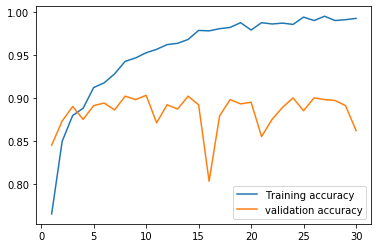

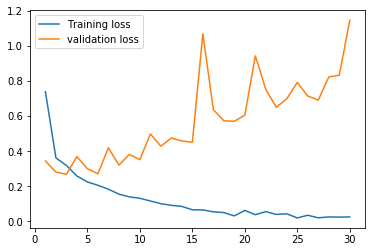

In [30]:
acc_loss_graphs(history_dense,30)

In [31]:
conv_base.trainable=False

In [32]:
aug_model=models.Sequential()
aug_model.add(conv_base)
aug_model.add(layers.Flatten())
aug_model.add(layers.Dense(256,activation='relu'))
aug_model.add(layers.Dense(1,activation='sigmoid'))
aug_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

# Please train model only on GPU

In [ ]:
history_aug=aug_model.fit(train_generator,steps_per_epoch=100,epochs=30,
                              validation_data=test_generator,validation_steps=50)